In [1]:
quadrante_numbers = [1] # 0 to 3
fish_identification = [1] # 1 to 2
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.options.mode.chained_assignment = None  # default='warn'

df = pd.read_csv("C:/Users/marcio/Documents/results_Ian/20191121_1454_iCab_L_C.avi.csv")

df = df.set_index(['frame_number'])

df["take"] = None
#the_second=False

In [2]:
#df = df.loc[(df["fish_id"] != "X") & (df["fish_id"] != "Y")]

import ast
df['fish_head'] = df['fish_head'].apply(ast.literal_eval)
df['fish_tail'] = df['fish_tail'].apply(ast.literal_eval)
#df['fish_id'] = df['fish_id'].apply(ast.literal_eval)
df['tail_points'] = df['tail_points'].apply(ast.literal_eval)
df['quad_coord'] = df['quad_coord'].apply(ast.literal_eval)

In [3]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take
frame_number,,,,,,,,,,
1201,21.023796,"(127, 669)","(170, 653)","(108, 678)",0,619.5,X,"[(676, 113), (669, 127), (663, 141), (658, 155...","(0, 430, 414, 440)",None
1201,18.248288,"(210, 532)","(248, 532)","(192, 529)",0,405.0,Y,"[(531, 204), (534, 215), (534, 226), (533, 237...","(0, 430, 414, 440)",None
1201,13.601471,"(598, 546)","(616, 520)","(590, 557)",1,323.5,X,"[(552, 594), (544, 599), (536, 605), (528, 610...","(440, 426, 408, 444)",None
1201,15.811388,"(450, 526)","(483, 546)","(437, 517)",1,335.0,Y,"[(521, 443), (528, 453), (533, 463), (539, 473...","(440, 426, 408, 444)",None
1201,11.401754,"(636, 95)","(630, 71)","(639, 106)",2,270.0,X,"[(99, 637), (92, 635), (85, 634), (78, 632), (...","(440, 0, 408, 403)",None
...,...,...,...,...,...,...,...,...,...,...
3452,13.892444,"(445, 456)","(454, 488)","(438, 444)",1,344.5,1,"[(448, 439), (458, 448), (468, 454), (478, 456...","(440, 426, 408, 444)",None
3452,16.492423,"(691, 399)","(725, 395)","(675, 403)",2,255.5,1,"[(400, 681), (399, 692), (399, 703), (398, 714...","(440, 0, 408, 403)",None
3452,16.155494,"(104, 177)","(70, 192)","(119, 171)",3,366.0,2,"[(176, 110), (180, 100), (183, 90), (187, 80),...","(0, 0, 416, 409)",None


In [4]:
set_number = 1
for quadrant in quadrante_numbers:    
    for fish_ident in fish_identification:        
        list_frames = list(df[(df["quadrant"] == quadrant) & ((df["fish_id"] == str(fish_ident)) | (df["fish_id"] == "X") | (df["fish_id"] == "Y")) ].index.unique())
        for idx, value in enumerate(list_frames):
            if idx > 0:
                the_value = df.loc[(df.index==value) & (df.quadrant == quadrant) & ((df["fish_id"] == str(fish_ident)) | (df["fish_id"] == "X") | (df["fish_id"] == "Y")), 'fish_id'].iloc[0]
                previous_value = df.loc[(df.index==list_frames[idx-1]) & (df.quadrant == quadrant) & ((df["fish_id"] == str(fish_ident)) | (df["fish_id"] == "X") | (df["fish_id"] == "Y")), 'fish_id'].iloc[0]
                if the_value.isnumeric() and previous_value.isnumeric():
                    df.loc[(df.index==value) & (df.quadrant == quadrant) & (df["fish_id"] == str(fish_ident)), "take"] = set_number
                    
                elif not the_value.isnumeric() and (previous_value.isnumeric()):
                    set_number+=1
                            
                elif the_value.isnumeric() and not (previous_value.isnumeric()):
                    df.loc[(df.index==value) & (df.quadrant == quadrant) & (df["fish_id"] == str(fish_ident)), "take"] = set_number
                

In [5]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take
frame_number,,,,,,,,,,
1201,21.023796,"(127, 669)","(170, 653)","(108, 678)",0,619.5,X,"[(676, 113), (669, 127), (663, 141), (658, 155...","(0, 430, 414, 440)",None
1201,18.248288,"(210, 532)","(248, 532)","(192, 529)",0,405.0,Y,"[(531, 204), (534, 215), (534, 226), (533, 237...","(0, 430, 414, 440)",None
1201,13.601471,"(598, 546)","(616, 520)","(590, 557)",1,323.5,X,"[(552, 594), (544, 599), (536, 605), (528, 610...","(440, 426, 408, 444)",None
1201,15.811388,"(450, 526)","(483, 546)","(437, 517)",1,335.0,Y,"[(521, 443), (528, 453), (533, 463), (539, 473...","(440, 426, 408, 444)",None
1201,11.401754,"(636, 95)","(630, 71)","(639, 106)",2,270.0,X,"[(99, 637), (92, 635), (85, 634), (78, 632), (...","(440, 0, 408, 403)",None
...,...,...,...,...,...,...,...,...,...,...
3452,13.892444,"(445, 456)","(454, 488)","(438, 444)",1,344.5,1,"[(448, 439), (458, 448), (468, 454), (478, 456...","(440, 426, 408, 444)",1
3452,16.492423,"(691, 399)","(725, 395)","(675, 403)",2,255.5,1,"[(400, 681), (399, 692), (399, 703), (398, 714...","(440, 0, 408, 403)",None
3452,16.155494,"(104, 177)","(70, 192)","(119, 171)",3,366.0,2,"[(176, 110), (180, 100), (183, 90), (187, 80),...","(0, 0, 416, 409)",None


In [6]:
df_filtered = df[(df['take'].notnull())]
#df['fish_id'] = df['fish_id'].apply(ast.literal_eval)
df_filtered['fish_id'] = df_filtered['fish_id'].apply(lambda x: int(x)) 



In [7]:
df_filtered

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take
frame_number,,,,,,,,,,
1261,14.142136,"(585, 582)","(565, 556)","(595, 592)",1,324.5,1,"[(588, 590), (581, 584), (573, 578), (565, 571...","(440, 426, 408, 444)",1
1262,14.212670,"(586, 583)","(565, 556)","(595, 594)",1,330.5,1,"[(588, 591), (581, 584), (573, 579), (565, 571...","(440, 426, 408, 444)",1
1263,14.212670,"(587, 584)","(568, 557)","(596, 595)",1,326.5,1,"[(589, 592), (581, 585), (573, 579), (565, 573...","(440, 426, 408, 444)",1
1264,14.422205,"(589, 584)","(569, 558)","(597, 596)",1,328.0,1,"[(590, 594), (582, 586), (574, 580), (566, 573...","(440, 426, 408, 444)",1
1265,13.453624,"(590, 586)","(570, 563)","(600, 595)",1,321.0,1,"[(590, 595), (584, 588), (577, 582), (571, 576...","(440, 426, 408, 444)",1
...,...,...,...,...,...,...,...,...,...,...
3448,15.652476,"(445, 466)","(446, 500)","(438, 452)",1,350.5,1,"[(460, 442), (470, 448), (480, 451), (490, 450...","(440, 426, 408, 444)",1
3449,14.317821,"(444, 461)","(451, 495)","(438, 448)",1,343.5,1,"[(454, 440), (464, 448), (474, 451), (484, 451...","(440, 426, 408, 444)",1
3450,13.416408,"(444, 457)","(451, 490)","(438, 445)",1,346.0,1,"[(449, 439), (459, 445), (469, 451), (479, 452...","(440, 426, 408, 444)",1


In [8]:
df_filtered["angle"] = np.NAN


In [9]:
df_filtered["angle"] = df_filtered.apply(lambda x: (x.fish_head, x.tail_points[1]), axis=1)


In [10]:
df_filtered["rotation"] = np.NAN

In [11]:
import math

def calc_rotation(angle):
    x = angle[0][0] - angle[1][1]   #must invert, as squeleton points is y,x
    
    y = angle[0][1] - angle[1][0]   #must invert, as squeleton points is y,x
   
    dual_degree = math.atan2(y*-1, x) * 180 / np.pi
    
                  
      
    

    return dual_degree


df_filtered["rotation"] = df_filtered["angle"].apply(calc_rotation)


In [12]:
df_filtered['abs_rotation'] = abs(df_filtered['rotation'])
df_filtered
#df_filtered['Btime'].iloc[0]

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation
frame_number,,,,,,,,,,,,,
1261,14.142136,"(585, 582)","(565, 556)","(595, 592)",1,324.5,1,"[(588, 590), (581, 584), (573, 578), (565, 571...","(440, 426, 408, 444)",1,"((595, 592), (581, 584))",-45.000000,45.000000
1262,14.212670,"(586, 583)","(565, 556)","(595, 594)",1,330.5,1,"[(588, 591), (581, 584), (573, 579), (565, 571...","(440, 426, 408, 444)",1,"((595, 594), (581, 584))",-49.763642,49.763642
1263,14.212670,"(587, 584)","(568, 557)","(596, 595)",1,326.5,1,"[(589, 592), (581, 585), (573, 579), (565, 573...","(440, 426, 408, 444)",1,"((596, 595), (581, 585))",-51.842773,51.842773
1264,14.422205,"(589, 584)","(569, 558)","(597, 596)",1,328.0,1,"[(590, 594), (582, 586), (574, 580), (566, 573...","(440, 426, 408, 444)",1,"((597, 596), (582, 586))",-51.842773,51.842773
1265,13.453624,"(590, 586)","(570, 563)","(600, 595)",1,321.0,1,"[(590, 595), (584, 588), (577, 582), (571, 576...","(440, 426, 408, 444)",1,"((600, 595), (584, 588))",-42.510447,42.510447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448,15.652476,"(445, 466)","(446, 500)","(438, 452)",1,350.5,1,"[(460, 442), (470, 448), (480, 451), (490, 450...","(440, 426, 408, 444)",1,"((438, 452), (470, 448))",119.054604,119.054604
3449,14.317821,"(444, 461)","(451, 495)","(438, 448)",1,343.5,1,"[(454, 440), (464, 448), (474, 451), (484, 451...","(440, 426, 408, 444)",1,"((438, 448), (464, 448))",122.005383,122.005383
3450,13.416408,"(444, 457)","(451, 490)","(438, 445)",1,346.0,1,"[(449, 439), (459, 445), (469, 451), (479, 452...","(440, 426, 408, 444)",1,"((438, 445), (459, 445))",116.565051,116.565051


In [13]:
df_filtered['diff'] = df_filtered.groupby(["quadrant", "fish_id", "take"])['abs_rotation'].diff() #abs(df_filtered['abs_rotation'] - df_filtered['abs_rotation'].shift(1))



In [14]:
df_filtered.head(10)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation,diff
frame_number,,,,,,,,,,,,,,
1261,14.142136,"(585, 582)","(565, 556)","(595, 592)",1,324.5,1,"[(588, 590), (581, 584), (573, 578), (565, 571...","(440, 426, 408, 444)",1,"((595, 592), (581, 584))",-45.000000,45.000000,NaN
1262,14.212670,"(586, 583)","(565, 556)","(595, 594)",1,330.5,1,"[(588, 591), (581, 584), (573, 579), (565, 571...","(440, 426, 408, 444)",1,"((595, 594), (581, 584))",-49.763642,49.763642,4.763642
1263,14.212670,"(587, 584)","(568, 557)","(596, 595)",1,326.5,1,"[(589, 592), (581, 585), (573, 579), (565, 573...","(440, 426, 408, 444)",1,"((596, 595), (581, 585))",-51.842773,51.842773,2.079132
1264,14.422205,"(589, 584)","(569, 558)","(597, 596)",1,328.0,1,"[(590, 594), (582, 586), (574, 580), (566, 573...","(440, 426, 408, 444)",1,"((597, 596), (582, 586))",-51.842773,51.842773,0.000000
1265,13.453624,"(590, 586)","(570, 563)","(600, 595)",1,321.0,1,"[(590, 595), (584, 588), (577, 582), (571, 576...","(440, 426, 408, 444)",1,"((600, 595), (584, 588))",-42.510447,42.510447,-9.332326
1266,14.866069,"(591, 585)","(568, 562)","(601, 596)",1,328.5,1,"[(592, 597), (584, 589), (576, 583), (570, 575...","(440, 426, 408, 444)",1,"((601, 596), (584, 589))",-45.000000,45.000000,2.489553
1267,14.866069,"(592, 586)","(569, 563)","(602, 597)",1,333.0,1,"[(592, 597), (585, 590), (577, 584), (569, 577...","(440, 426, 408, 444)",1,"((602, 597), (585, 590))",-45.000000,45.000000,0.000000
1268,14.142136,"(594, 588)","(573, 562)","(604, 598)",1,331.0,1,"[(593, 600), (586, 592), (578, 585), (570, 579...","(440, 426, 408, 444)",1,"((604, 598), (586, 592))",-45.000000,45.000000,0.000000
1269,14.866069,"(596, 588)","(574, 563)","(607, 598)",1,331.5,1,"[(593, 601), (586, 593), (578, 585), (571, 578...","(440, 426, 408, 444)",1,"((607, 598), (586, 593))",-40.601295,40.601295,-4.398705


<AxesSubplot:>

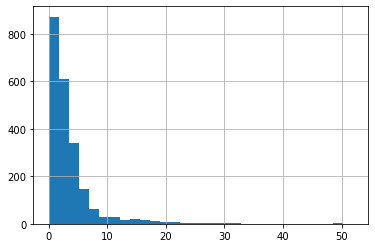

In [15]:
df_filtered["diff"].abs().hist(bins = 30)

In [16]:
df_filtered["displace"] = np.NAN

for quadrant in quadrante_numbers:
    print(quadrant)
    for fish_ident in fish_identification:
        print(fish_ident)
        the_takes = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident)]["take"].unique()
        print(the_takes)
        for take_id in the_takes:
            list_frames = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident) & (df_filtered["take"] == take_id)].index.values
            #print(list_frames)
            for idx, value in enumerate(list_frames):
                if idx > 0:
                    
                               
                    the_value = df_filtered.loc[(df_filtered.index==value) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id ) & (df_filtered.fish_id == fish_ident ), 'fish_head'].iloc[0]
                    previous_value = df_filtered.loc[(df_filtered.index==list_frames[idx-1]) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id) & (df_filtered.fish_id == fish_ident ), 'fish_head'].iloc[0]           
                                        
                    df_filtered.loc[(df_filtered.index==value) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id ) & (df_filtered.fish_id == fish_ident ), 'displace'] = ((the_value[0] - previous_value[0])**2 \
                    + (the_value[1] - previous_value[1])**2)**0.5
                            
                    
      
        
       
                


    


    



1
1
[1]


In [17]:
df_filtered.head(10)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation,diff,displace
frame_number,,,,,,,,,,,,,,,
1261,14.142136,"(585, 582)","(565, 556)","(595, 592)",1,324.5,1,"[(588, 590), (581, 584), (573, 578), (565, 571...","(440, 426, 408, 444)",1,"((595, 592), (581, 584))",-45.000000,45.000000,NaN,NaN
1262,14.212670,"(586, 583)","(565, 556)","(595, 594)",1,330.5,1,"[(588, 591), (581, 584), (573, 579), (565, 571...","(440, 426, 408, 444)",1,"((595, 594), (581, 584))",-49.763642,49.763642,4.763642,2.000000
1263,14.212670,"(587, 584)","(568, 557)","(596, 595)",1,326.5,1,"[(589, 592), (581, 585), (573, 579), (565, 573...","(440, 426, 408, 444)",1,"((596, 595), (581, 585))",-51.842773,51.842773,2.079132,1.414214
1264,14.422205,"(589, 584)","(569, 558)","(597, 596)",1,328.0,1,"[(590, 594), (582, 586), (574, 580), (566, 573...","(440, 426, 408, 444)",1,"((597, 596), (582, 586))",-51.842773,51.842773,0.000000,1.414214
1265,13.453624,"(590, 586)","(570, 563)","(600, 595)",1,321.0,1,"[(590, 595), (584, 588), (577, 582), (571, 576...","(440, 426, 408, 444)",1,"((600, 595), (584, 588))",-42.510447,42.510447,-9.332326,3.162278
1266,14.866069,"(591, 585)","(568, 562)","(601, 596)",1,328.5,1,"[(592, 597), (584, 589), (576, 583), (570, 575...","(440, 426, 408, 444)",1,"((601, 596), (584, 589))",-45.000000,45.000000,2.489553,1.414214
1267,14.866069,"(592, 586)","(569, 563)","(602, 597)",1,333.0,1,"[(592, 597), (585, 590), (577, 584), (569, 577...","(440, 426, 408, 444)",1,"((602, 597), (585, 590))",-45.000000,45.000000,0.000000,1.414214
1268,14.142136,"(594, 588)","(573, 562)","(604, 598)",1,331.0,1,"[(593, 600), (586, 592), (578, 585), (570, 579...","(440, 426, 408, 444)",1,"((604, 598), (586, 592))",-45.000000,45.000000,0.000000,2.236068
1269,14.866069,"(596, 588)","(574, 563)","(607, 598)",1,331.5,1,"[(593, 601), (586, 593), (578, 585), (571, 578...","(440, 426, 408, 444)",1,"((607, 598), (586, 593))",-40.601295,40.601295,-4.398705,3.000000


Calculate the predicted next position if fish would be swimming straight

<AxesSubplot:>

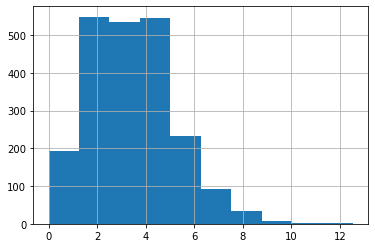

In [18]:
df_filtered["displace"].hist()

In [19]:
df_filtered

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation,diff,displace
frame_number,,,,,,,,,,,,,,,
1261,14.142136,"(585, 582)","(565, 556)","(595, 592)",1,324.5,1,"[(588, 590), (581, 584), (573, 578), (565, 571...","(440, 426, 408, 444)",1,"((595, 592), (581, 584))",-45.000000,45.000000,NaN,NaN
1262,14.212670,"(586, 583)","(565, 556)","(595, 594)",1,330.5,1,"[(588, 591), (581, 584), (573, 579), (565, 571...","(440, 426, 408, 444)",1,"((595, 594), (581, 584))",-49.763642,49.763642,4.763642,2.000000
1263,14.212670,"(587, 584)","(568, 557)","(596, 595)",1,326.5,1,"[(589, 592), (581, 585), (573, 579), (565, 573...","(440, 426, 408, 444)",1,"((596, 595), (581, 585))",-51.842773,51.842773,2.079132,1.414214
1264,14.422205,"(589, 584)","(569, 558)","(597, 596)",1,328.0,1,"[(590, 594), (582, 586), (574, 580), (566, 573...","(440, 426, 408, 444)",1,"((597, 596), (582, 586))",-51.842773,51.842773,0.000000,1.414214
1265,13.453624,"(590, 586)","(570, 563)","(600, 595)",1,321.0,1,"[(590, 595), (584, 588), (577, 582), (571, 576...","(440, 426, 408, 444)",1,"((600, 595), (584, 588))",-42.510447,42.510447,-9.332326,3.162278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448,15.652476,"(445, 466)","(446, 500)","(438, 452)",1,350.5,1,"[(460, 442), (470, 448), (480, 451), (490, 450...","(440, 426, 408, 444)",1,"((438, 452), (470, 448))",119.054604,119.054604,2.489553,4.123106
3449,14.317821,"(444, 461)","(451, 495)","(438, 448)",1,343.5,1,"[(454, 440), (464, 448), (474, 451), (484, 451...","(440, 426, 408, 444)",1,"((438, 448), (464, 448))",122.005383,122.005383,2.950779,4.000000
3450,13.416408,"(444, 457)","(451, 490)","(438, 445)",1,346.0,1,"[(449, 439), (459, 445), (469, 451), (479, 452...","(440, 426, 408, 444)",1,"((438, 445), (459, 445))",116.565051,116.565051,-5.440332,3.000000


In [20]:
df_filtered["next_predicted"] = None
from sklearn.linear_model import LinearRegression

def reg(row):
    coord=row["angle"]
    distance = row["displace"]
    #print(type(distance))
    #print(coord)
    #print(distance)
    
    if not np.isnan(distance):
        print("calculate")
        x = np.array([coord[1][1], coord[0][0]]).reshape((-1, 1)) # need to invert as tail is y and x and  not xy
        y = np.array([coord[1][0], coord[0][1]])
        model_regression = LinearRegression()
        model_regression.fit(x, y)
        model_regression = LinearRegression().fit(x, y)
        
        #calculate the next x based on distance of body and head
        calc = coord[1][1] - coord[0][0]
        if calc > 0:
            calc_x = coord[0][0] - distance
        else:
            calc_x = coord[0][0] + distance
            
        
        x = np.array([calc_x]).reshape((-1, 1))
        y_pred = model_regression.predict(x)
        return (int(calc_x), int(y_pred[0]))
    else:
        return None

df_filtered["next_predicted"] = df_filtered.apply(reg, axis = 1)

calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate


In [21]:
df_filtered.head(100)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation,diff,displace,next_predicted
frame_number,,,,,,,,,,,,,,,,
1261,14.142136,"(585, 582)","(565, 556)","(595, 592)",1,324.5,1,"[(588, 590), (581, 584), (573, 578), (565, 571...","(440, 426, 408, 444)",1,"((595, 592), (581, 584))",-45.000000,45.000000,NaN,NaN,None
1262,14.212670,"(586, 583)","(565, 556)","(595, 594)",1,330.5,1,"[(588, 591), (581, 584), (573, 579), (565, 571...","(440, 426, 408, 444)",1,"((595, 594), (581, 584))",-49.763642,49.763642,4.763642,2.000000,"(597, 596)"
1263,14.212670,"(587, 584)","(568, 557)","(596, 595)",1,326.5,1,"[(589, 592), (581, 585), (573, 579), (565, 573...","(440, 426, 408, 444)",1,"((596, 595), (581, 585))",-51.842773,51.842773,2.079132,1.414214,"(597, 596)"
1264,14.422205,"(589, 584)","(569, 558)","(597, 596)",1,328.0,1,"[(590, 594), (582, 586), (574, 580), (566, 573...","(440, 426, 408, 444)",1,"((597, 596), (582, 586))",-51.842773,51.842773,0.000000,1.414214,"(598, 597)"
1265,13.453624,"(590, 586)","(570, 563)","(600, 595)",1,321.0,1,"[(590, 595), (584, 588), (577, 582), (571, 576...","(440, 426, 408, 444)",1,"((600, 595), (584, 588))",-42.510447,42.510447,-9.332326,3.162278,"(603, 597)"
1266,14.866069,"(591, 585)","(568, 562)","(601, 596)",1,328.5,1,"[(592, 597), (584, 589), (576, 583), (570, 575...","(440, 426, 408, 444)",1,"((601, 596), (584, 589))",-45.000000,45.000000,2.489553,1.414214,"(602, 597)"
1267,14.866069,"(592, 586)","(569, 563)","(602, 597)",1,333.0,1,"[(592, 597), (585, 590), (577, 584), (569, 577...","(440, 426, 408, 444)",1,"((602, 597), (585, 590))",-45.000000,45.000000,0.000000,1.414214,"(603, 598)"
1268,14.142136,"(594, 588)","(573, 562)","(604, 598)",1,331.0,1,"[(593, 600), (586, 592), (578, 585), (570, 579...","(440, 426, 408, 444)",1,"((604, 598), (586, 592))",-45.000000,45.000000,0.000000,2.236068,"(606, 600)"
1269,14.866069,"(596, 588)","(574, 563)","(607, 598)",1,331.5,1,"[(593, 601), (586, 593), (578, 585), (571, 578...","(440, 426, 408, 444)",1,"((607, 598), (586, 593))",-40.601295,40.601295,-4.398705,3.000000,"(610, 600)"


In [22]:
df_filtered['diff_pred'] = np.NaN

for quadrant in quadrante_numbers:
    for fish_ident in fish_identification:
        the_takes = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident)]["take"].unique()
        for take_id in the_takes:
            list_frames = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident) & (df_filtered["take"] == take_id)].index.values
            #print(list_frames)
            for idx, value in enumerate(list_frames):
                if idx > 0:                   
                    print("will apply")                                                      
                    current_position = df_filtered.loc[(df_filtered.index==value) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id ) & (df_filtered.fish_id == fish_ident ), 'angle'].iloc[0][0]
                    predicted_position = df_filtered.loc[(df_filtered.index==list_frames[idx-1]) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id) & (df_filtered.fish_id == fish_ident ), 'next_predicted'].iloc[0]           
                    if isinstance(predicted_position, tuple):
                        distance = ((current_position[0] - predicted_position[0])**2 + (current_position[1] - predicted_position[1])**2)**0.5
                        df_filtered.loc[(df_filtered.index==value) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id ) & (df_filtered.fish_id == fish_ident ), 'diff_pred'] = distance
                                
                    
      
       

        
        




will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply

In [23]:
df_filtered['sequence'] = None
sequence_number = 1
for quadrant in quadrante_numbers:
    for fish_ident in fish_identification:
        the_takes = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident)]["take"].unique()
        for take_id in the_takes:
            #sequence_number = 1

            list_frames = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident) & (df_filtered["take"] == take_id)].index.values
            #print(list_frames)
            for idx, value in enumerate(list_frames):
                
                the_fish = df_filtered[(df_filtered.index == value) & (df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident) & (df_filtered["take"] == take_id)]
                
                #print(the_fish)
               
                
                if  (the_fish['diff_pred'].iloc[0] < 3) and (the_fish['diff'].iloc[0] < 2)  and (the_fish['displace'].iloc[0] < 6.5):
                   #(the_fish['diff_pred'].iloc[0] < 50) and
                    df_filtered.loc[(df_filtered.index == value) & (df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident) & (df_filtered["take"] == take_id), 'sequence'] = sequence_number 
                    #df_filtered.loc[df_filtered.index[idx], 'sequence'] = sequence_number
                else:
                   
                    sequence_number = sequence_number + 1









In [24]:
df_filtered.head(100)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation,diff,displace,next_predicted,diff_pred,sequence
frame_number,,,,,,,,,,,,,,,,,,
1261,14.142136,"(585, 582)","(565, 556)","(595, 592)",1,324.5,1,"[(588, 590), (581, 584), (573, 578), (565, 571...","(440, 426, 408, 444)",1,"((595, 592), (581, 584))",-45.000000,45.000000,NaN,NaN,None,NaN,None
1262,14.212670,"(586, 583)","(565, 556)","(595, 594)",1,330.5,1,"[(588, 591), (581, 584), (573, 579), (565, 571...","(440, 426, 408, 444)",1,"((595, 594), (581, 584))",-49.763642,49.763642,4.763642,2.000000,"(597, 596)",NaN,None
1263,14.212670,"(587, 584)","(568, 557)","(596, 595)",1,326.5,1,"[(589, 592), (581, 585), (573, 579), (565, 573...","(440, 426, 408, 444)",1,"((596, 595), (581, 585))",-51.842773,51.842773,2.079132,1.414214,"(597, 596)",1.414214,None
1264,14.422205,"(589, 584)","(569, 558)","(597, 596)",1,328.0,1,"[(590, 594), (582, 586), (574, 580), (566, 573...","(440, 426, 408, 444)",1,"((597, 596), (582, 586))",-51.842773,51.842773,0.000000,1.414214,"(598, 597)",0.000000,4
1265,13.453624,"(590, 586)","(570, 563)","(600, 595)",1,321.0,1,"[(590, 595), (584, 588), (577, 582), (571, 576...","(440, 426, 408, 444)",1,"((600, 595), (584, 588))",-42.510447,42.510447,-9.332326,3.162278,"(603, 597)",2.828427,4
1266,14.866069,"(591, 585)","(568, 562)","(601, 596)",1,328.5,1,"[(592, 597), (584, 589), (576, 583), (570, 575...","(440, 426, 408, 444)",1,"((601, 596), (584, 589))",-45.000000,45.000000,2.489553,1.414214,"(602, 597)",2.236068,None
1267,14.866069,"(592, 586)","(569, 563)","(602, 597)",1,333.0,1,"[(592, 597), (585, 590), (577, 584), (569, 577...","(440, 426, 408, 444)",1,"((602, 597), (585, 590))",-45.000000,45.000000,0.000000,1.414214,"(603, 598)",0.000000,5
1268,14.142136,"(594, 588)","(573, 562)","(604, 598)",1,331.0,1,"[(593, 600), (586, 592), (578, 585), (570, 579...","(440, 426, 408, 444)",1,"((604, 598), (586, 592))",-45.000000,45.000000,0.000000,2.236068,"(606, 600)",1.000000,5
1269,14.866069,"(596, 588)","(574, 563)","(607, 598)",1,331.5,1,"[(593, 601), (586, 593), (578, 585), (571, 578...","(440, 426, 408, 444)",1,"((607, 598), (586, 593))",-40.601295,40.601295,-4.398705,3.000000,"(610, 600)",2.236068,5


<AxesSubplot:>

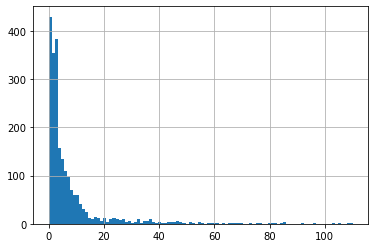

In [25]:
df_filtered["diff_pred"].hist(bins=100)

In [26]:
count_df = df_filtered.groupby('sequence')['sequence'].count()


In [27]:
filtered_count = count_df[count_df > 5]

In [28]:
filtered_count = filtered_count.index.tolist()

In [29]:
filtered_count = set(filtered_count)

In [30]:
final_df = df_filtered[df_filtered['sequence'].isin(filtered_count)]


In [31]:
final_df["coord_plus_seq"] = np.NaN
final_df["coord_plus_seq"] = final_df.apply(lambda x: x.fish_head + (int(x.sequence),) + ((x.tail_points),), axis = 1)


In [32]:
final_df = final_df[['length_of_fish', 'center_of_mass', 'fish_tail',
       'fish_head', 'quadrant', 'fish_area', 'fish_id', 'tail_points', 
       'quad_coord', 'sequence', "take"]]



In [33]:
final_df.to_csv('C:/Users/marcio/Documents/fish_analyzer_rotated' + '.csv', mode='w', index=True, header=True)


In [34]:
pd.set_option('display.max_rows', 1000000)

final_df.loc[final_df["quadrant"] == 1].head(100)


,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,sequence,take
frame_number,,,,,,,,,,,
1288,14.866069,"(638, 623)","(616, 599)","(648, 634)",1,332.5,1,"[(629, 643), (622, 636), (614, 630), (606, 623...","(440, 426, 408, 444)",12,1
1289,14.866069,"(641, 626)","(619, 601)","(651, 637)",1,331.0,1,"[(630, 645), (623, 637), (616, 630), (609, 623...","(440, 426, 408, 444)",12,1
1290,14.866069,"(644, 629)","(620, 607)","(654, 640)",1,333.5,1,"[(632, 647), (625, 640), (618, 634), (613, 627...","(440, 426, 408, 444)",12,1
1291,14.866069,"(647, 633)","(625, 608)","(657, 644)",1,328.0,1,"[(638, 652), (630, 644), (622, 639), (614, 633...","(440, 426, 408, 444)",12,1
1292,14.866069,"(650, 636)","(630, 609)","(660, 647)",1,332.5,1,"[(643, 657), (635, 649), (626, 641), (618, 635...","(440, 426, 408, 444)",12,1
1293,14.866069,"(653, 639)","(631, 614)","(663, 650)",1,334.5,1,"[(643, 658), (636, 650), (629, 643), (622, 635...","(440, 426, 408, 444)",12,1
1294,16.278821,"(655, 641)","(631, 614)","(666, 653)",1,337.5,1,"[(648, 661), (639, 652), (630, 646), (623, 637...","(440, 426, 408, 444)",12,1
1356,15.000000,"(735, 760)","(703, 758)","(750, 760)",1,328.5,1,"[(760, 744), (760, 734), (759, 724), (758, 714...","(440, 426, 408, 444)",34,1
1357,15.000000,"(737, 760)","(704, 757)","(752, 760)",1,330.5,1,"[(760, 748), (760, 737), (760, 726), (759, 715...","(440, 426, 408, 444)",34,1
